In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as st
import copy

The aim of this notebook is to demonstrate the effect that different types of outliers can have on the slope of the fitted linear model. We can distinguish three types of outliers:

- A high leverage point is an observation that is horizontally distant with respect to the rest of observations. A high leverage point may or may not have a big impact on the slope of the fitted linear model.
- An influential point is a leverage point that has a big impact on the slope of the linear model
- Finally, we can have outliers that are neigher high leverage nor influential points.

In [2]:
SIZE = 25
def generate_random_linear_sample(slope, intercept, noise_std, x_init, x_end):
    x = np.random.uniform(x_init, x_end, SIZE)
    y = x*slope + intercept + np.random.normal(0, noise_std, SIZE)
    
    return (x,y)

In [3]:
SLOPE = -1.23
INTERCEPT = 5
NOISE_STD = 5
x, y = generate_random_linear_sample(SLOPE, INTERCEPT, NOISE_STD, 20, 80)

### No outliers

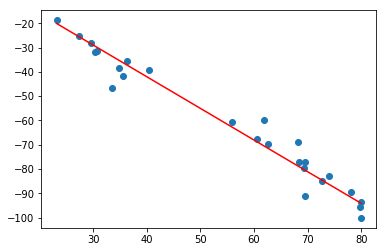

In [4]:
R = 1/(len(x) - 1)*np.sum((x - np.mean(x))*(y - np.mean(y))/(np.std(x) * np.std(y)))
b1 = R * np.std(y) / np.std(x)
b0 = np.mean(y) - b1 * np.mean(x)

def predict(x, b0, b1):
    return(b0 + b1*x)

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot([np.min(x), np.max(x)], [predict(np.min(x), b0, b1), predict(np.max(x), b0, b1)], 'r')

### High leverage (non-influential) point

This kind of outlier does not have a big impact on the slope of the fitted linear model. The continuous line represents the linear model fitted from the original dataset (without outliers). The dashed line represents the linear model fitted from the dataset after adding the outlier.

In [5]:
x_c = copy.deepcopy(x)
y_c = copy.deepcopy(y)

x_c = np.append(x_c, 120)
y_c = np.append(y_c, 120*SLOPE + INTERCEPT + np.random.normal(0, 0, 1))

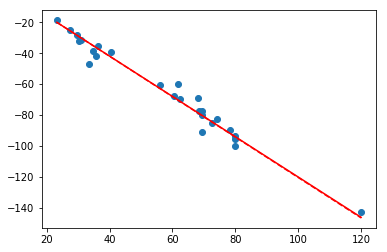

In [6]:
R_c = 1/(len(x_c) - 1)*np.sum((x_c - np.mean(x_c))*(y_c - np.mean(y_c))/(np.std(x_c) * np.std(y_c)))
b1_c = R_c * np.std(y_c) / np.std(x_c)
b0_c = np.mean(y_c) - b1_c * np.mean(x_c)

fig, ax = plt.subplots()
ax.scatter(x_c, y_c)
ax.plot([np.min(x_c), np.max(x_c)], [predict(np.min(x_c), b0, b1), predict(np.max(x_c), b0, b1)], 'r--')
ax.plot([np.min(x_c), np.max(x_c)], [predict(np.min(x_c), b0_c, b1_c), predict(np.max(x_c), b0_c, b1_c)], 'r')

### Influential point

This kind of outlier has a big impact on th eslope of the fitted linear model.The continuous line represents the linear model fitted from the original dataset (without outliers). The dashed line represents the linear model fitted from the dataset after adding the outlier.

In [7]:
x_c = copy.deepcopy(x)
y_c = copy.deepcopy(y)

x_c = np.append(x_c, 120)
y_c = np.append(y_c, 120*SLOPE + INTERCEPT + 20)

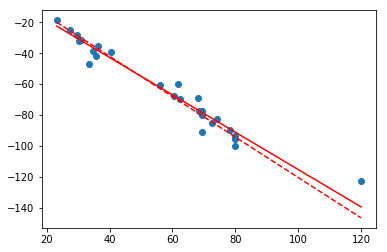

In [8]:
R_c = 1/(len(x_c) - 1)*np.sum((x_c - np.mean(x_c))*(y_c - np.mean(y_c))/(np.std(x_c) * np.std(y_c)))
b1_c = R_c * np.std(y_c) / np.std(x_c)
b0_c = np.mean(y_c) - b1_c * np.mean(x_c)

fig, ax = plt.subplots()
ax.scatter(x_c, y_c)
ax.plot([np.min(x_c), np.max(x_c)], [predict(np.min(x_c), b0, b1), predict(np.max(x_c), b0, b1)], 'r--')
ax.plot([np.min(x_c), np.max(x_c)], [predict(np.min(x_c), b0_c, b1_c), predict(np.max(x_c), b0_c, b1_c)], 'r')

### Non-high leverage point

This outlier has some effect on the slope, but not as much as an influential point. 

In [9]:
x_c = copy.deepcopy(x)
y_c = copy.deepcopy(y)

x_c = np.append(x_c, 65)
y_c = np.append(y_c, 65*SLOPE + INTERCEPT + 20)

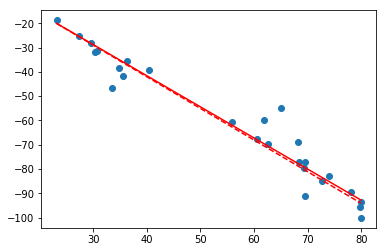

In [10]:
R_c = 1/(len(x_c) - 1)*np.sum((x_c - np.mean(x_c))*(y_c - np.mean(y_c))/(np.std(x_c) * np.std(y_c)))
b1_c = R_c * np.std(y_c) / np.std(x_c)
b0_c = np.mean(y_c) - b1_c * np.mean(x_c)

fig, ax = plt.subplots()
ax.scatter(x_c, y_c)
ax.plot([np.min(x_c), np.max(x_c)], [predict(np.min(x_c), b0, b1), predict(np.max(x_c), b0, b1)], 'r--')
ax.plot([np.min(x_c), np.max(x_c)], [predict(np.min(x_c), b0_c, b1_c), predict(np.max(x_c), b0_c, b1_c)], 'r')